## Observations and Insights

## Dependencies and starter code

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results,on='Mouse ID')
df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM (standard error of the mean)
# of the tumor volume for each regimen
drug_groups = df.groupby('Drug Regimen')
drug_sem = drug_groups['Tumor Volume (mm3)'].sem()
descriptive_stats = drug_groups['Tumor Volume (mm3)'].describe()
descriptive_stats
combined_stats = pd.concat([drug_sem,descriptive_stats],axis=1)
combined_stats

,Tumor Volume (mm3),count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,,
Capomulin,0.329346,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,0.469821,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,0.492236,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,0.603860,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,0.596466,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,0.581331,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,0.512884,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,0.320955,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,0.573111,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar plots

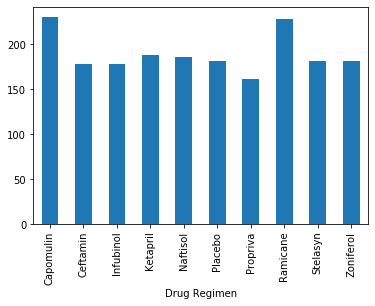

In [116]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
descriptive_stats['count'].plot.bar()

Text(0, 0.5, 'Count of Mice')

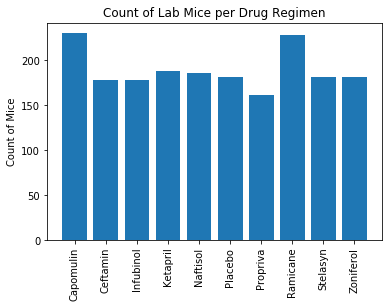

In [113]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(combined_stats))
plt.bar(x_axis,descriptive_stats['count'])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,
           ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],
           rotation='vertical')
plt.title('Count of Lab Mice per Drug Regimen')
plt.ylabel('Count of Mice')

## Pie plots

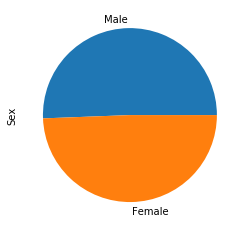

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df['Sex'].value_counts().plot(kind='pie')

([<matplotlib.patches.Wedge at 0x1fb0b0cd988>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')])

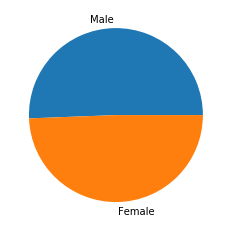

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df['Sex'].value_counts()

plt.pie(df['Sex'].value_counts(),labels=['Male','Female'])

## Quartiles, outliers and boxplots

In [97]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

final_tumor = df.loc[df['Timepoint']==45,['Drug Regimen','Tumor Volume (mm3)']]
# final_tumor = final_tumor.reset_index(drop=True)
# final_tumor

#final_tumor = final_tumor.loc[final_tumor['Drug Regimen']=='Capumulin'|final_tumor['Drug Regimen']=='Ramicane'|final_tumor['Drug Regimen']=='Infubinol'|final_tumor['Drug Regimen']=='Ceftamin',:]
### Idk why this isn't working?
cap = final_tumor.loc[final_tumor['Drug Regimen']=='Capomulin',:]
ram = final_tumor.loc[final_tumor['Drug Regimen']=='Ramicane',:]
inf = final_tumor.loc[final_tumor['Drug Regimen']=='Infubinol',:]
ceft = final_tumor.loc[final_tumor['Drug Regimen']=='Ceftamin',:]

df2 = cap.append([ram,inf,ceft])
df2_grouped = df2.groupby('Drug Regimen')
df3 = df2_grouped.describe()
print(df3)
#IQR is 75th percentile - 25th percentile

### Calculate IQR Capomulin
#25th percentile for Capomulin
cap_25 = df3.iloc[0,4]
#75th percentile for Capomulin
cap_75 = df3.iloc[0,6]
cap_iqr = cap_75 - cap_25

### Calculate IQR Ramicane
#25th percentile
ram_25 = df3.iloc[3,4]
#75th percentilen
ram_75 = df3.iloc[3,6]
ram_iqr = ram_75 - ram_25

### Calculate IQR Infubinol
#25th percentile
inf_25 = df3.iloc[2,4]
#75th percentile
inf_75 = df3.iloc[2,6]
inf_iqr = inf_75 - inf_25

### Calculate IQR Ceftamin
#25th percentile
ceft_25 = df3.iloc[1,4]
#75th percentile
ceft_75 = df3.iloc[1,6]
ceft_iqr = ceft_75 - ceft_25

## Note: could also do the following for IQR
# quartiles = df3['Tumor Volume (mm3)'].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

### Outliers?
# Define: any data point more than 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile
cap_range = [cap_25-(1.5*cap_iqr),cap_75+(1.5*cap_iqr)]
ram_range = [ram_25-(1.5*ram_iqr),ram_75+(1.5*ram_iqr)]
inf_range = [inf_25-(1.5*inf_iqr),inf_75+(1.5*inf_iqr)]
ceft_range = [ceft_25-(1.5*ceft_iqr),ceft_75+(1.5*ceft_iqr)]

print(cap_range)
print(ceft_range)
print(inf_range)
print(ram_range)


## The min and max of each drug is contained within the interval for the definition of an outlier. 
## Therefore, there are no outliers in our data.

#Can double check that below
cap_outlier_occupancy = cap.loc[(cap['Tumor Volume (mm3)'] < cap_range[0]) | (cap['Tumor Volume (mm3)'] > cap_range[1])]
cap_outlier_occupancy
ram_outlier_occupancy = ram.loc[(ram['Tumor Volume (mm3)'] < ram_range[0]) | (ram['Tumor Volume (mm3)'] > ram_range[1])]
ram_outlier_occupancy
inf_outlier_occupancy = inf.loc[(inf['Tumor Volume (mm3)'] < inf_range[0]) | (inf['Tumor Volume (mm3)'] > inf_range[1])]
inf_outlier_occupancy
ceft_outlier_occupancy = ceft.loc[(ceft['Tumor Volume (mm3)'] < ceft_range[0]) | (ceft['Tumor Volume (mm3)'] > ceft_range[1])]
ceft_outlier_occupancy


             Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                  21.0  36.236114  5.608969  23.343598  32.377357   
Ceftamin                   13.0  64.132421  3.253497  59.741901  61.433892   
Infubinol                   9.0  65.755562  3.433282  60.918767  62.754451   
Ramicane                   20.0  34.955595  5.486439  22.050126  30.981175   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     37.311846  40.159220  47.685963  
Ceftamin      64.299830  67.527482  68.923185  
Infubinol     66.083066  67.685569  72.226731  
Ramicane      34.848627  38.508305  45.220869  
[20.70456164999999, 51.83201549]
[52.29350701999999, 76.66786758]
[55.35777559500001, 75.08224443499999]
[19.69048010

,Drug Regimen,Tumor Volume (mm3)


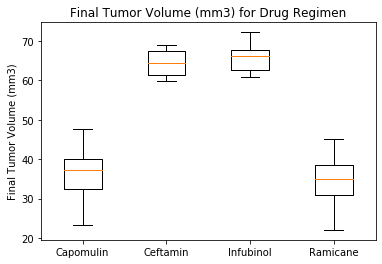

In [108]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Some data to plot
Capomulin = pd.Series(cap['Tumor Volume (mm3)'])
Ceftamin = pd.Series(ceft['Tumor Volume (mm3)'])
Infubinol = pd.Series(inf['Tumor Volume (mm3)'])
Ramicane = pd.Series(ram['Tumor Volume (mm3)'])

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume (mm3) for Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot([Capomulin,Ceftamin,Infubinol,Ramicane])
plt.xticks([1,2,3,4], ['Capomulin','Ceftamin','Infubinol','Ramicane'])
plt.show()

## Line and scatter plots

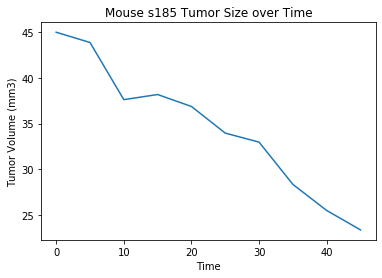

In [117]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = df.loc[df['Drug Regimen']=='Capomulin',['Mouse ID','Timepoint','Tumor Volume (mm3)']]
# Take only one mouse
s185 = capomulin.loc[df['Mouse ID']=='s185',:]
x = s185['Timepoint']
y = s185['Tumor Volume (mm3)']
plt.plot(x,y)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time')
plt.title('Mouse s185 Tumor Size over Time')
plt.show()

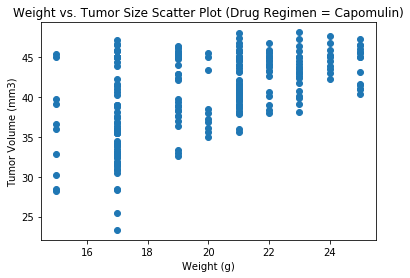

In [120]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_data = df.loc[df['Drug Regimen']=='Capomulin',['Mouse ID','Tumor Volume (mm3)','Weight (g)']]
x = scatter_data['Weight (g)']
y = scatter_data['Tumor Volume (mm3)']
plt.scatter(x,y)
plt.title('Weight vs. Tumor Size Scatter Plot (Drug Regimen = Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


10      37.826265
11      37.826265
12      37.826265
13      37.826265
14      37.826265
          ...    
440     44.553034
1452    45.514001
1453    45.514001
1454    45.514001
1455    45.514001
Name: Weight (g), Length: 230, dtype: float64
y = 0.96x +21.49


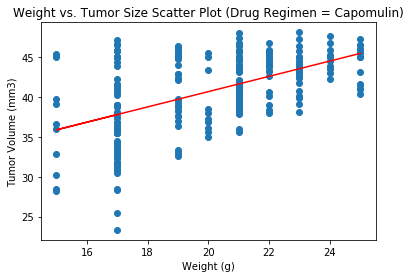

The correlation coefficient between mouse weight and average tumor volume for mice treated with Capomulin regimen is 0.53.


In [127]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
scatter_data = df.loc[df['Drug Regimen']=='Capomulin',['Mouse ID','Tumor Volume (mm3)','Weight (g)']]
x = scatter_data['Weight (g)']
y = scatter_data['Tumor Volume (mm3)']

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

# Get regression values
regress_values = x * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title('Weight vs. Tumor Size Scatter Plot (Drug Regimen = Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

print(f"The correlation coefficient between mouse weight and average tumor volume for mice treated with Capomulin regimen is {round(rvalue,2)}.")